In [ ]:

#  pip install tensorflow matplotlib numpy scikit-learn

In [4]:
# Step 2: Import Libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical, image_dataset_from_directory

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 12s 1us/step
MNIST training data shape: (60000, 28, 28)
MNIST test data shape: (10000, 28, 28)


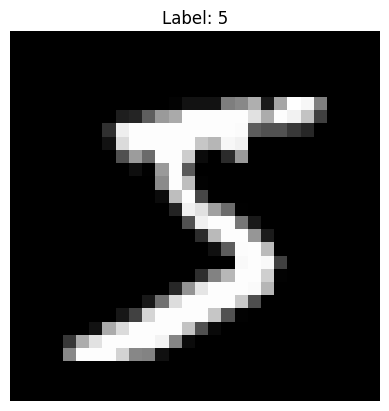

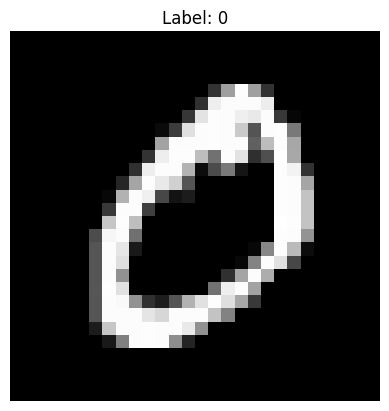

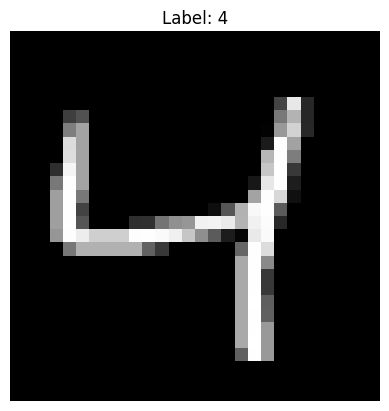

In [5]:
# Step 3: Load the MNIST Dataset
(x_mnist, y_mnist), (x_test, y_test) = mnist.load_data()

print("MNIST training data shape:", x_mnist.shape)
print("MNIST test data shape:", x_test.shape)

# Optional: Visualize first few samples
for i in range(3):
    plt.imshow(x_mnist[i], cmap='gray')
    plt.title(f"Label: {y_mnist[i]}")
    plt.axis('off')
    plt.show()


In [6]:
# Step 4: Preprocess MNIST Data

# Normalize pixel values
x_mnist = x_mnist.astype('float32') / 255.0

# Reshape to (N, 28, 28, 1)
x_mnist = x_mnist.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_mnist = to_categorical(y_mnist, num_classes=10)


In [8]:
# Step 5: Load Your Own Images (From ./data Folder)
own_dataset = image_dataset_from_directory(
    'data',
    labels='inferred',
    label_mode='categorical',  # one-hot encoded automatically
    color_mode='grayscale',
    image_size=(28, 28),
    batch_size=256,
    shuffle=True
)

# Convert batches to numpy arrays
own_images = []
own_labels = []

for images, labels in own_dataset:
    own_images.append(images.numpy())
    own_labels.append(labels.numpy())

x_own = np.concatenate(own_images)
y_own = np.concatenate(own_labels)

# Normalize own images
x_own = x_own / 255.0


Found 199 files belonging to 10 classes.


In [9]:
# Step 6: Merge MNIST and Own Data
x_combined = np.concatenate([x_mnist, x_own], axis=0)
y_combined = np.concatenate([y_mnist, y_own], axis=0)

# Train/Validation Split
x_train, x_val, y_train, y_val = train_test_split(
    x_combined, y_combined, test_size=0.2, random_state=42, shuffle=True
)


In [10]:
# Step 7: Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # 10 output classes
])


c:\Users\Ali\Desktop\cvproc\cv_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Step 8: Compile the Model

# Use categorical_crossentropy since labels are one-hot encoded
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [12]:
# Step 9: Train the Model
early_stop = EarlyStopping(monitor="val_loss", patience=3)

history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stop]
)


Epoch 1/15
753/753 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.8363 - loss: 0.5056 - val_accuracy: 0.9772 - val_loss: 0.0682
Epoch 2/15
753/753 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.9753 - loss: 0.0840 - val_accuracy: 0.9824 - val_loss: 0.0547
Epoch 3/15
753/753 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.9814 - loss: 0.0587 - val_accuracy: 0.9840 - val_loss: 0.0504
Epoch 4/15
753/753 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.9845 - loss: 0.0478 - val_accuracy: 0.9846 - val_loss: 0.0465
Epoch 5/15
753/753 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.9880 - loss: 0.0374 - val_accuracy: 0.9873 - val_loss: 0.0385
Epoch 6/15
753/753 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.9901 - loss: 0.0311 - val_accuracy: 0.9874 - val_loss: 0.0407
Epoch 7/15
753/753 ━━━━━━━━━━━━━━━━━━━━ 32s 42ms/step - accuracy: 0.9914 - loss: 0.0266 - val_accuracy: 0.9870 - val_loss: 0.0413
Epoch 8/15
753/753 ━━━━━━━━━━━━━━━━━━━━ 32s 43ms/step - accuracy: 0.9923 - loss: 0.0235 - 

In [13]:
# Step 10: Evaluate on Validation Set
val_loss, val_accuracy = model.evaluate(x_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.2f}")


377/377 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9871 - loss: 0.0416
Validation Accuracy: 0.99


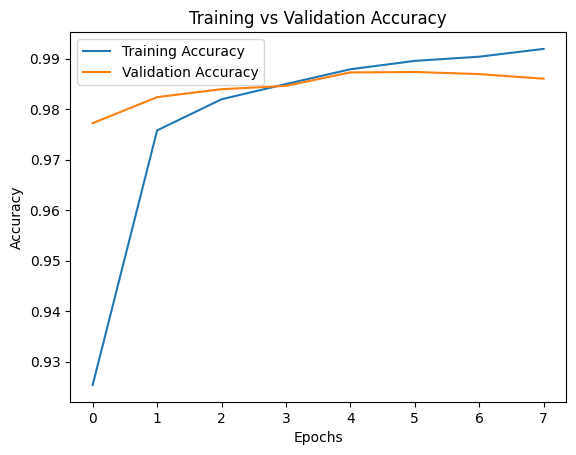

In [14]:
# Step 11: Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


377/377 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


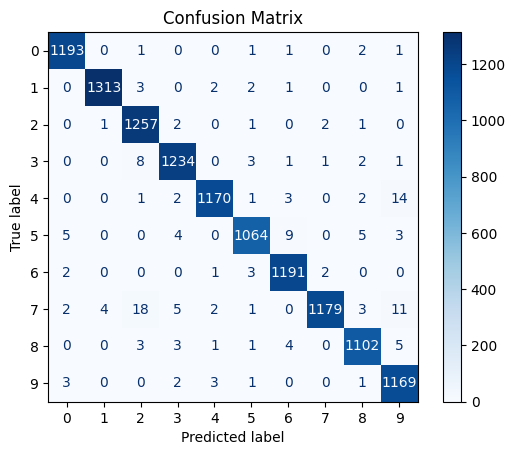

In [15]:
# Step 12: Confusion Matrix

# Predict class labels
y_pred = np.argmax(model.predict(x_val), axis=1)
y_true = np.argmax(y_val, axis=1)

cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


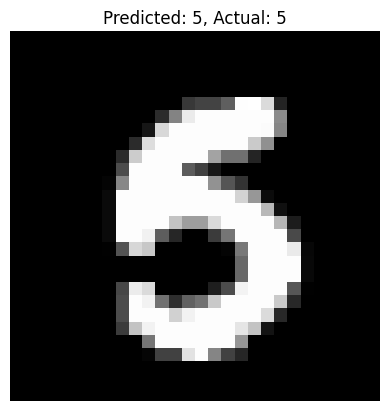

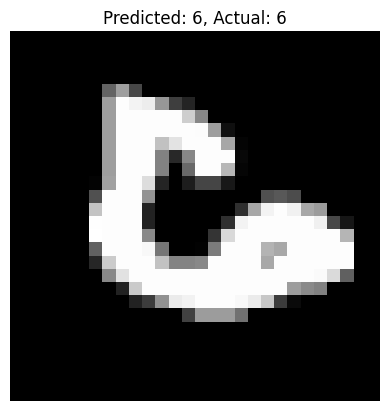

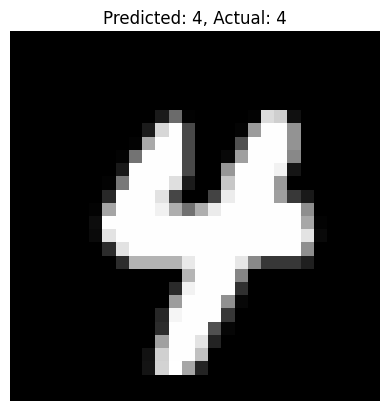

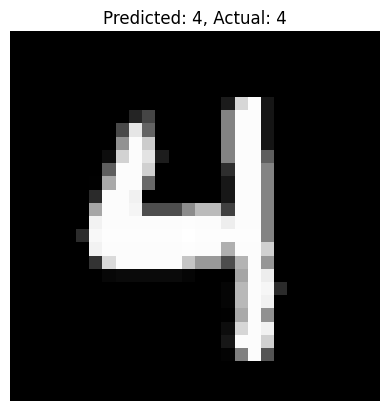

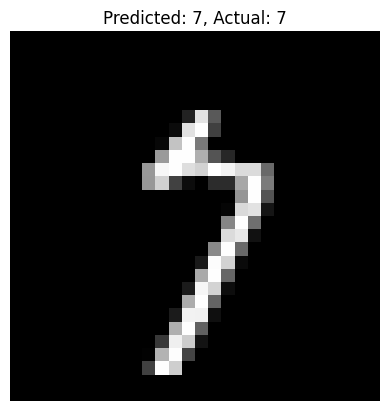

In [16]:
# Step 13: Show Predictions on Some Samples

for i in range(5):
    image = x_val[i].reshape(28, 28)
    plt.imshow(image, cmap='gray')
    pred = y_pred[i]
    actual = y_true[i]
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()


In [17]:
# Step 14: Save the Model
model.save("digit_model.h5")
print("Model saved as digit_model.h5")


Model saved as digit_model.h5
